## Denetimsiz Öğrenme

## Kütüphaneler

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Veri Seti

In [7]:
df = pd.read_csv("USArrests.csv",index_col = 0 )

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
df.info

<bound method DataFrame.info of                 Murder  Assault  UrbanPop  Rape
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine              2.1       83        51   7.8
Maryland

In [12]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


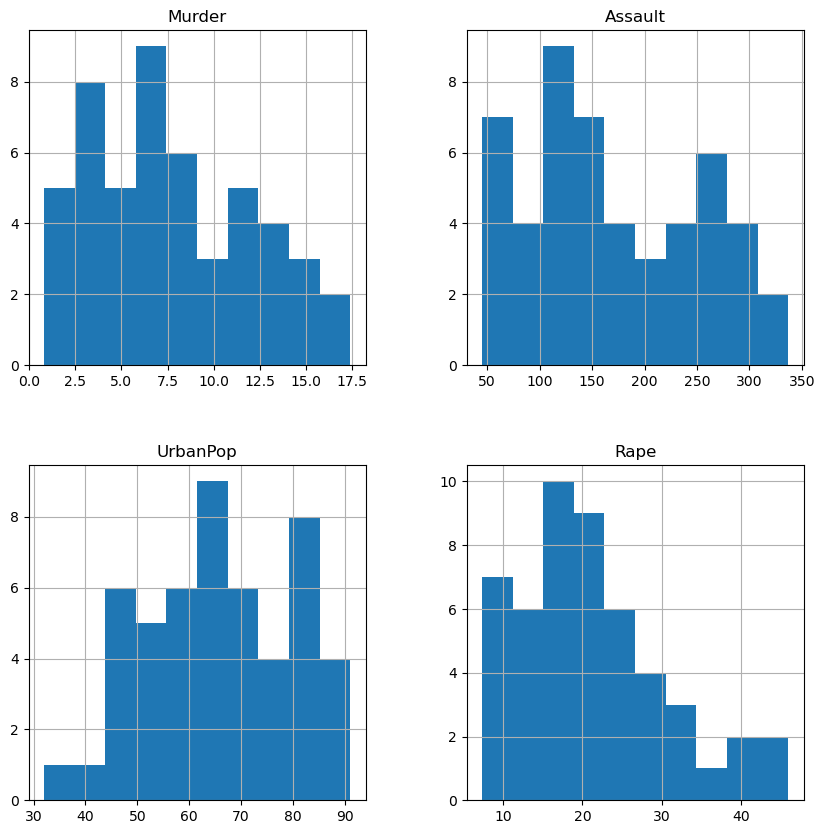

In [14]:
df.hist(figsize=(10,10));

1-K-Means  

1.1-Uygulama

In [15]:
kMeans = KMeans(n_clusters=4)

In [17]:
kMeans

KMeans(n_clusters=4)

In [18]:
kFit = kMeans.fit(df)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
kFit.n_clusters

4

In [21]:
kFit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [22]:
kFit.labels_

array([1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3,
       2, 0, 0, 2, 2, 0])

1.2-Kümelerin Görselleştirilmesi

In [23]:
kMeans = KMeans(n_clusters=2).fit(df)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
kumeler = kMeans.labels_

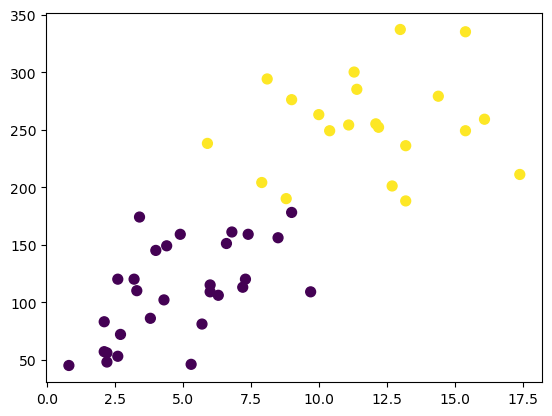

In [27]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,cmap='viridis',s=50)

In [28]:
merkezler = kMeans.cluster_centers_[:,0]

In [29]:
merkezler

array([ 4.84137931, 11.85714286])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

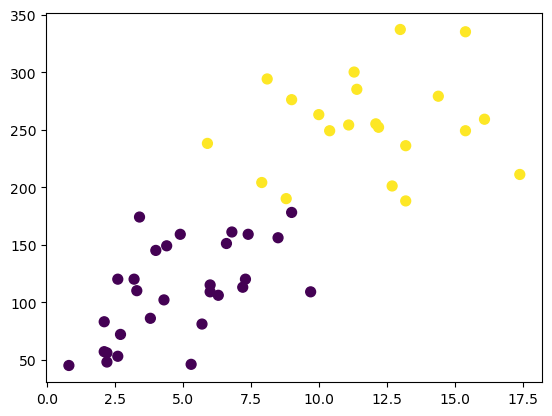

In [31]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,cmap='viridis',s=50)
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5);

1.3-Optimum Küme Sayısının Belirlenmesi

Elbow Yöntemi

In [32]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [38]:
ssd = []

K = range (1,30)

for k in K:
    kMeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kMeans.inertia_)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

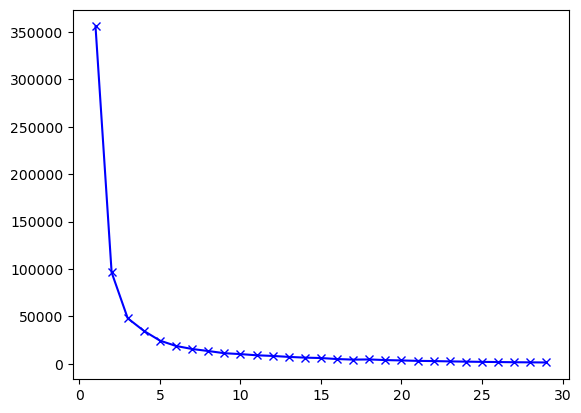

In [43]:
plt.plot(K,ssd,"bx-");

In [45]:
!pip install yellowbrick

In [46]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

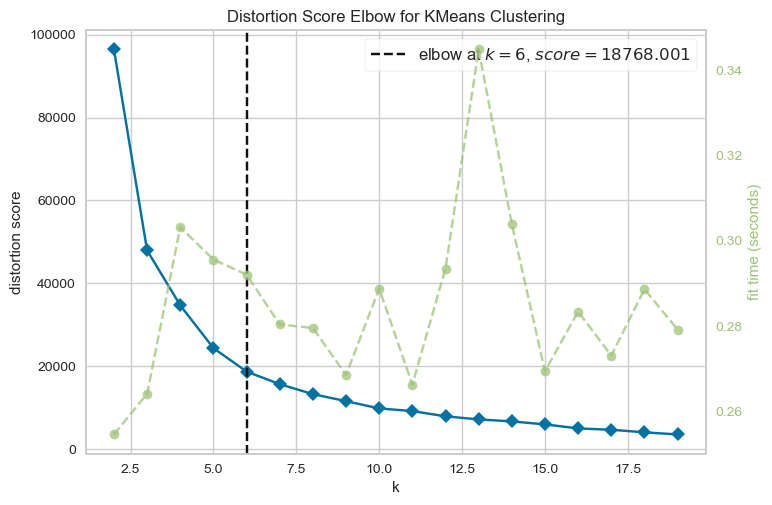

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
kMeans = KMeans()
visu = KElbowVisualizer(kMeans,k=(2,20))
visu.fit(df)
visu.poof()

In [50]:
kMeans = KMeans(n_clusters=4).fit(df)
kMeans

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [51]:
kumeler = kMeans.labels_

In [52]:
pd.DataFrame({"Eyaletler":df.index,"Eyaletler":kumeler})

,Eyaletler
0,0
1,0
2,0
3,2
4,0
5,2
6,1
7,0
8,0
9,2


In [55]:
df["Kume_No"] =kumeler

In [56]:
df

,Murder,Assault,UrbanPop,Rape,Kume_NO,Kume_No
Alabama,13.2,236,58,21.2,0,0
Alaska,10.0,263,48,44.5,0,0
Arizona,8.1,294,80,31.0,0,0
Arkansas,8.8,190,50,19.5,2,2
California,9.0,276,91,40.6,0,0
Colorado,7.9,204,78,38.7,2,2
Connecticut,3.3,110,77,11.1,1,1
Delaware,5.9,238,72,15.8,0,0
Florida,15.4,335,80,31.9,0,0
Georgia,17.4,211,60,25.8,2,2


## 2.1- Hiyerarşik Kümeleme

In [57]:
from scipy.cluster.hierarchy import linkage

In [58]:
# dendrogram : hiyerarşik yapıyı ifade eden görselin adıdır.
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

In [59]:
from scipy.cluster.hierarchy import dendrogram

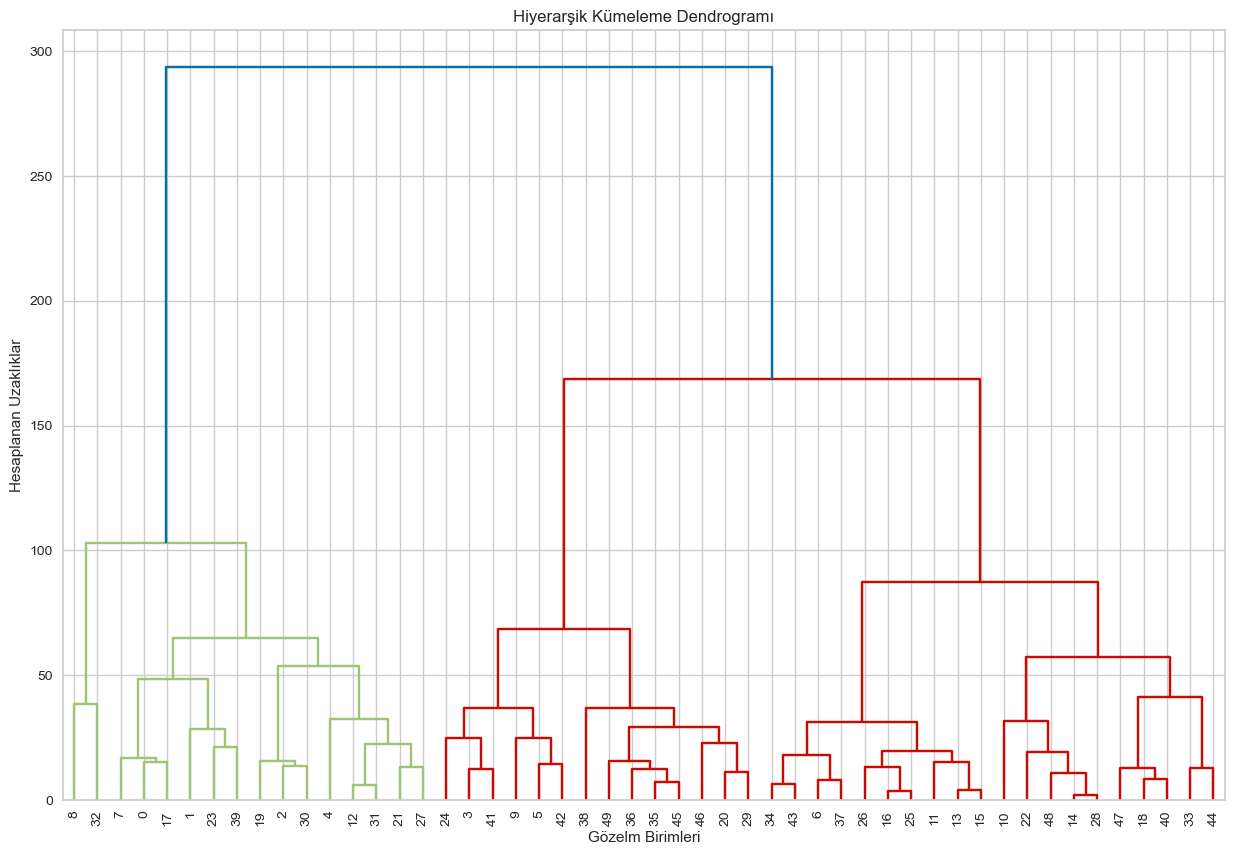

In [60]:
plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözelm Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")
dendrogram(hc_complete, leaf_font_size = 10);

In [61]:
# Bu grafiği y ekseninden istediğimiz yerden bölerek küme sayısına karar verbiliriz.
# 4 küme olduğunda gözlemler nasıl gözükür.

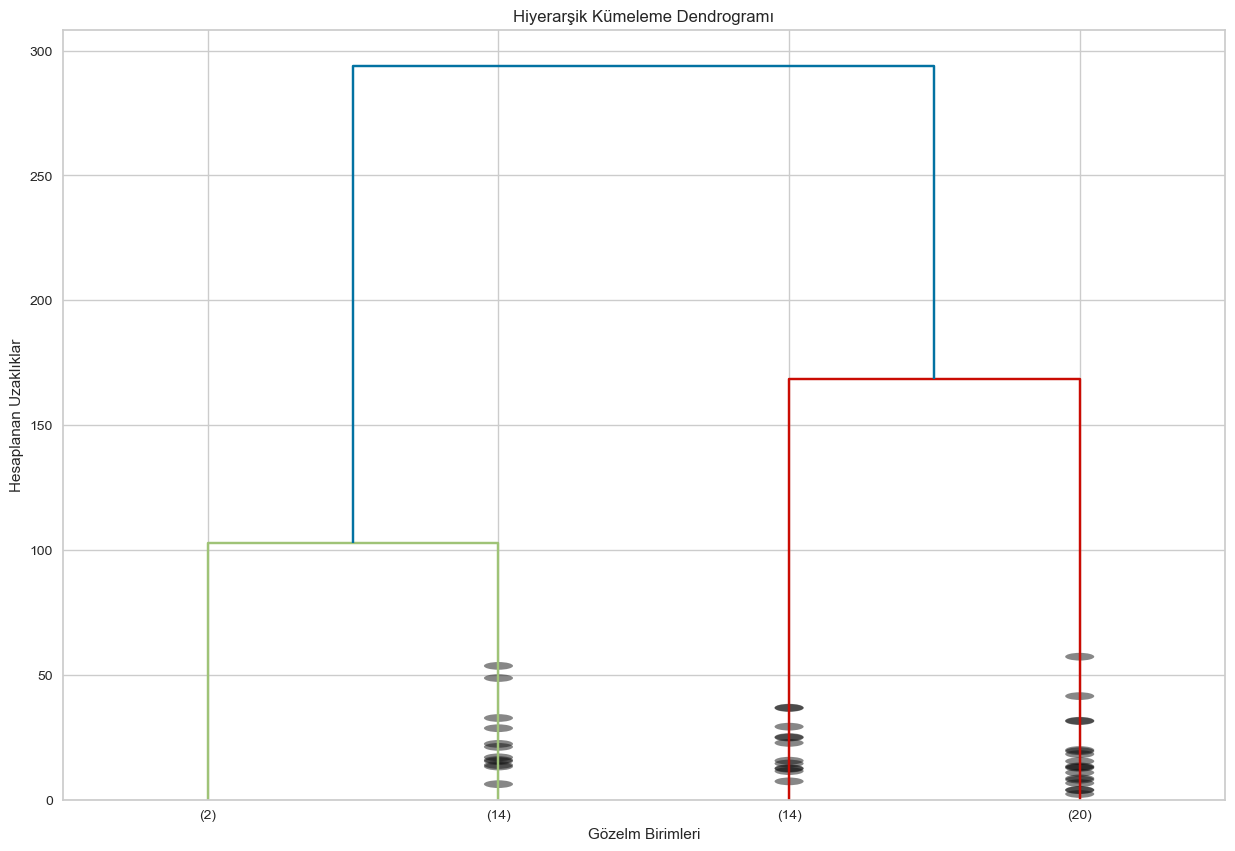

In [62]:
plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözelm Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")
dendrogram(hc_complete, truncate_mode = "lastp", p = 4,show_contracted = True, leaf_font_size = 10);

In [63]:
# truncate_mode = "lastp" : enson p adet göster
# p = 4 : Dört kümeye ayırmak istediğimiz için. Gösterilecek küme sayısı
# show_contracted = True : Kümelemeler yapıldığında kaçar tane eleman olduğunu göster.
# AVERAGE YÖNTEMİ İLE

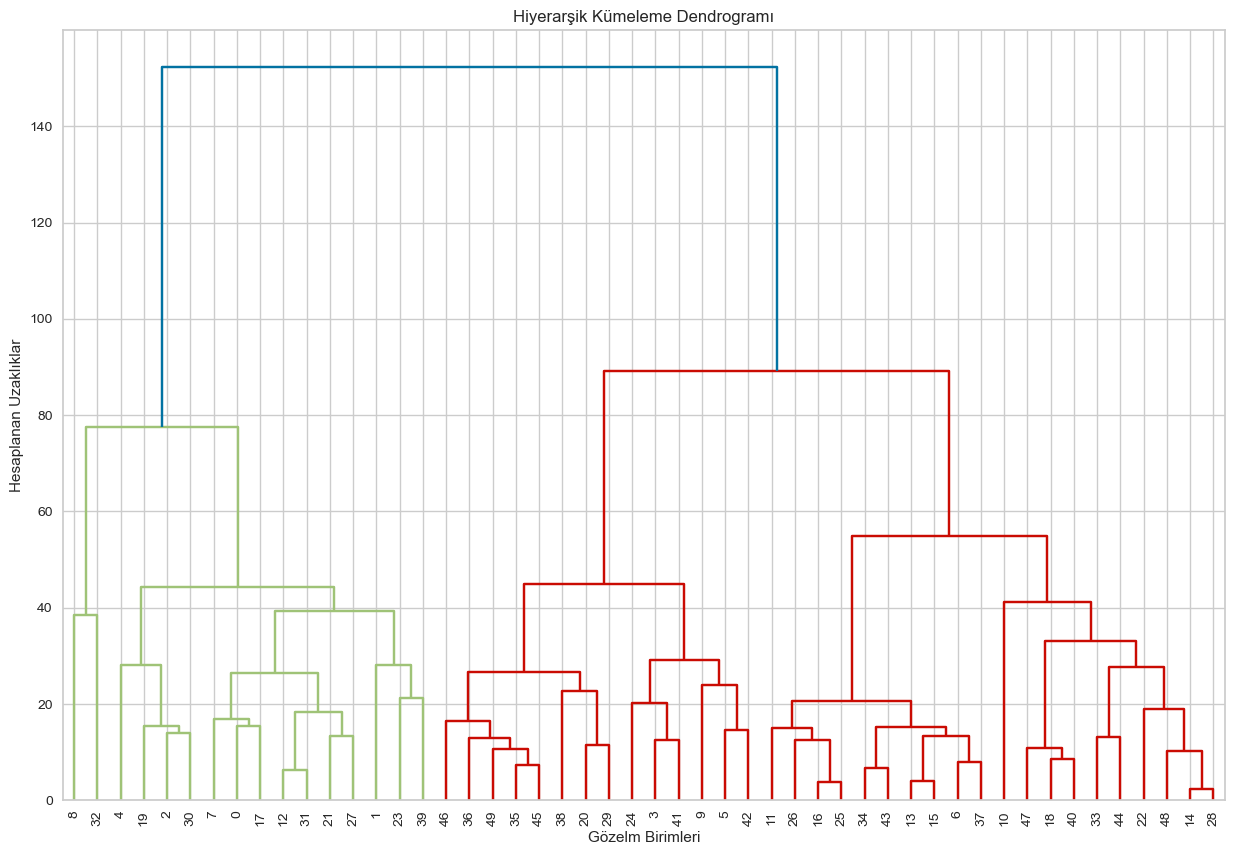

In [64]:
plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözelm Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")
dendrogram(hc_average, leaf_font_size = 10);

In [65]:
# Diğerinden biraz daha farklı çıkmaktadır.

## 3-Temel Bileşen Analizi Uygulama

In [67]:
df = pd.read_csv("Hitters.csv")

In [68]:
df.dropna(inplace = True)

In [69]:
df = df._get_numeric_data()

In [70]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
df = StandardScaler().fit_transform(df)

In [74]:
df[0:5][0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292,
        -0.0975271 ,  1.3978935 ,  0.3467905 ,  0.1743734 , -0.0029198 ,
        -0.12167086,  0.25896561,  0.43533435,  1.22149851, -0.52319133,
         0.21335208, -0.1353126 ],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962,
         1.6093726 , -0.90120024, -0.45286539, -0.4098921 , -0.07605382,
        -0.41510491, -0.19959036,  0.010373  ,  2.10910888, -0.25386267,
         0.81996395, -0.12420791],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654,
        -0.18979195,  0.77086793,  1.30155773,  1.31817358,  1.89856469,
         1.41205144,  1.57266648,  0.3556541 , -0.32466148, -0.74417894,
        -0.84821868, -0.07978915],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498,
        -0.51271892, -1.11020876, -0.99093521, -0.96015272, -0.69769298,
        -0.94752134, -0.88122761, -0.86231547,  1.84067833, -0.54390892,
        -0.69656571

In [75]:
from sklearn.decomposition import PCA

In [78]:
pca =PCA(n_components=2)

In [79]:
pca

PCA(n_components=2)

In [82]:
pcaFit = pca.fit_transform(df)

In [84]:
pcaFit

array([[ 7.68482432e-02,  1.65352465e+00],
       [ 3.37126792e-01, -2.32055981e+00],
       [ 3.40836188e+00,  7.55756506e-01],
       [-2.64222127e+00, -3.61486414e-01],
       [ 1.07168072e+00, -1.51167360e+00],
       [-4.14334694e+00,  1.52761501e+00],
       [-3.66187880e+00,  7.26482752e-01],
       [-3.46358326e+00, -1.11932250e-01],
       [ 3.95881864e+00,  2.16536132e+00],
       [ 2.97619746e+00, -2.18509076e+00],
       [-2.00435156e+00,  1.62310751e+00],
       [-8.22584224e-01, -5.87547914e-01],
       [-2.24564747e+00,  1.81903669e+00],
       [-1.12980749e+00,  2.57831292e+00],
       [ 5.74490571e+00,  2.22535369e-01],
       [-3.74756191e+00,  1.33933904e+00],
       [-3.28875794e+00,  2.29328755e+00],
       [-1.85723415e+00, -1.43268195e+00],
       [-2.29170256e+00, -9.25891185e-01],
       [ 2.54702025e-01, -1.12943118e+00],
       [ 5.83585565e+00, -2.23890882e-01],
       [ 7.95632970e-01, -1.52534619e+00],
       [-1.83824827e+00,  1.52283175e+00],
       [ 1.

In [85]:
bilesenDf =pd.DataFrame(data=pcaFit,columns=["Birinci Bileşen","İkinci Bileşen"])

In [86]:
bilesenDf

,Birinci Bileşen,İkinci Bileşen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [87]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

In [89]:
pca.components_[1]

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

In [90]:
# Optimum Bileşen sayısı

In [91]:
pca =PCA().fit(df)

Text(0, 0.5, 'Cumulative Varyans')

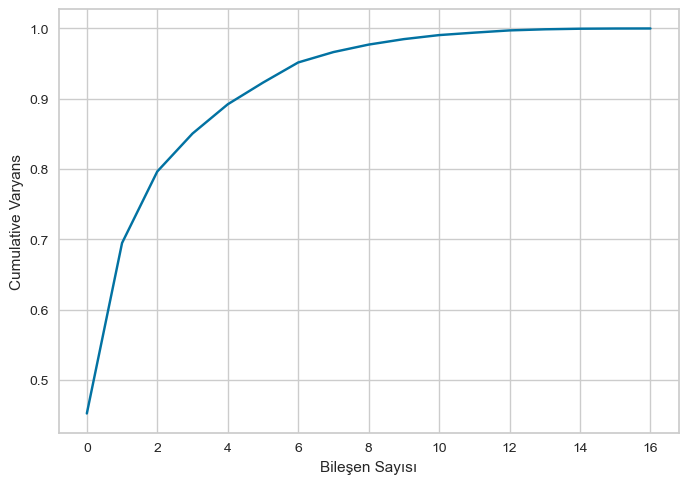

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Cumulative Varyans")

In [95]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

Final

In [96]:
pca =PCA(n_components=3)

In [97]:
pcaFit = pca.fit_transform(df)

In [98]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])